In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math
import seaborn as sns

In [70]:
#loading the excel file
data=pd.read_csv("C:\\Users\\Kalpa.Trader\\Desktop\\Python Cohort\\Data\\USDINR.csv")
data.head()


,Expiry,Previous settle,Open,High,Low,Close,Settle,Timestamp,Settlement diff,returns %,Adjusted Price(average)
0,11/26/2010,44.8400,44.8325,44.8725,44.7125,44.7425,44.7425,10/29/2010,NaN,NaN,44.74250
1,11/26/2010,44.7425,44.5975,44.7150,44.5600,44.6775,44.6775,11/1/2010,0.0,-0.15%,44.67750
2,11/26/2010,44.6775,44.6750,44.7025,44.5600,44.6200,44.6200,11/2/2010,0.0,-0.13%,44.62000
3,11/26/2010,44.6200,44.5000,44.6025,44.4275,44.5150,44.5150,11/3/2010,0.0,-0.24%,44.51500
4,11/26/2010,44.5150,44.4375,44.5100,44.3675,44.3800,44.3800,11/4/2010,0.0,-0.30%,44.29375


# Adjusted price is the average of the two prices, to account for expiry roll 

In [71]:
#adding other relevent rows
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Expiry']=pd.to_datetime(data['Expiry'])
data['Points']=data['Adjusted Price(average)']-data['Adjusted Price(average)'].shift(1)
data['Day_of_week']=data['Timestamp'].dt.dayofweek
data['Day_of_month']=data['Timestamp'].dt.day
data['month']=data['Timestamp'].dt.month
data['year']=data['Timestamp'].dt.year
data.head()

,Expiry,Previous settle,Open,High,Low,Close,Settle,Timestamp,Settlement diff,returns %,Adjusted Price(average),Points,Day_of_week,Day_of_month,month,year
0,2010-11-26,44.8400,44.8325,44.8725,44.7125,44.7425,44.7425,2010-10-29,NaN,NaN,44.74250,NaN,4.0,29.0,10.0,2010.0
1,2010-11-26,44.7425,44.5975,44.7150,44.5600,44.6775,44.6775,2010-11-01,0.0,-0.15%,44.67750,-0.06500,0.0,1.0,11.0,2010.0
2,2010-11-26,44.6775,44.6750,44.7025,44.5600,44.6200,44.6200,2010-11-02,0.0,-0.13%,44.62000,-0.05750,1.0,2.0,11.0,2010.0
3,2010-11-26,44.6200,44.5000,44.6025,44.4275,44.5150,44.5150,2010-11-03,0.0,-0.24%,44.51500,-0.10500,2.0,3.0,11.0,2010.0
4,2010-11-26,44.5150,44.4375,44.5100,44.3675,44.3800,44.3800,2010-11-04,0.0,-0.30%,44.29375,-0.22125,3.0,4.0,11.0,2010.0


In [72]:
#dividing data into insample and out of sample
data1=data[data['year']<=2017]
data2=data[data['year']>2017]

In [73]:
## Backtesting on in sample data - data1
#grouping the dataframe by year
data1_grouped=pd.DataFrame(data1)
data1_grouped=data1.groupby(['year','Day_of_week'])['Points'].sum().reset_index()

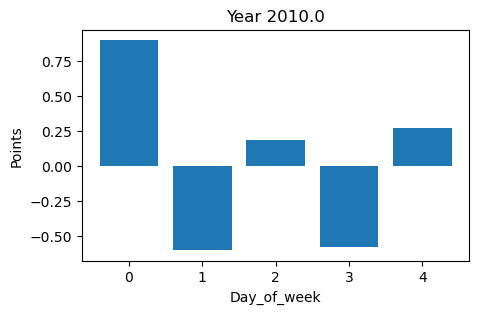

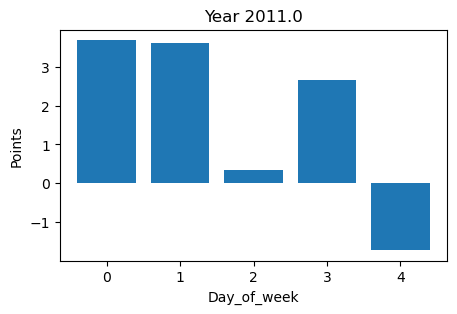

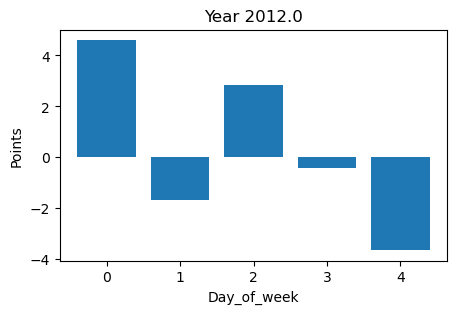

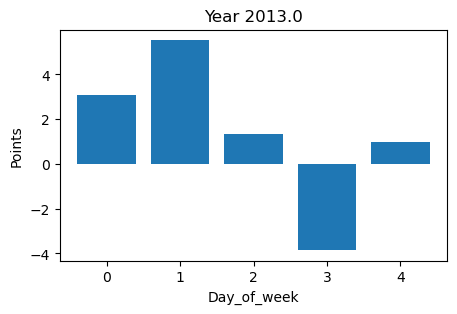

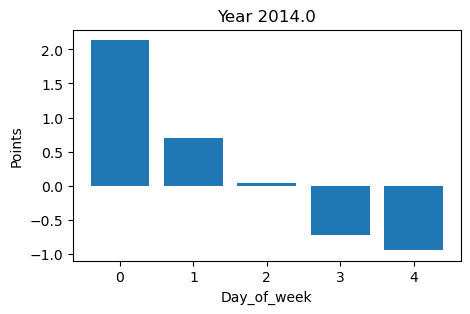

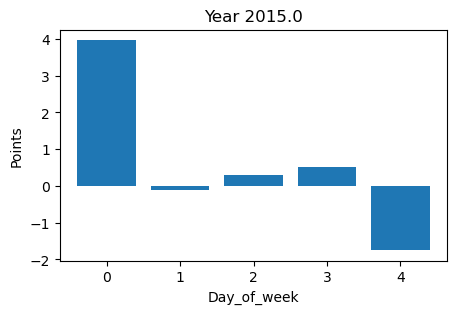

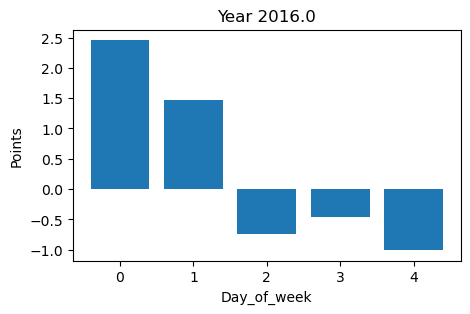

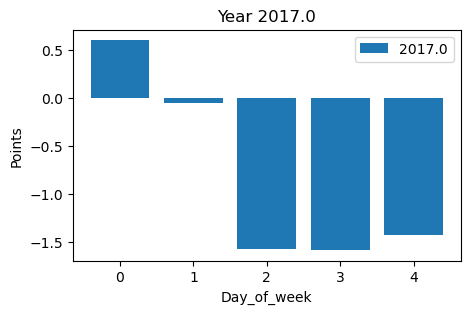

In [91]:
#Loop to make chart for each separate year
for year in data1_grouped['year'].unique():
    year_data = data1_grouped[data1_grouped['year'] == year]
    plt.figure(figsize=(5,3))
    x_values = year_data['Day_of_week']
    y_values = year_data['Points']
    plt.bar(x_values, y_values,label=str(year))

    plt.xlabel('Day_of_week')
    plt.ylabel('Points')
    plt.title('Year {}'.format(year))
plt.legend()
plt.show()

# All years show a positive return for monday,

# We will consider only the Friday-Monday combination

In [75]:
#backtesting Friday Buy - Monday Sell strategy
#creating the conditional points and % gains column
data1['daily%']=data1['Points']/data1['Adjusted Price(average)']*100
data1['position']=np.where((data1['Day_of_week']==4) & (data1['Day_of_week'].shift(-1)==0),1,0)
data1['gain%']=data1['position'].shift(1) * data1['daily%']
data1.head()

,Expiry,Previous settle,Open,High,Low,Close,Settle,Timestamp,Settlement diff,returns %,Adjusted Price(average),Points,Day_of_week,Day_of_month,month,year,daily%,position,gain%
0,2010-11-26,44.8400,44.8325,44.8725,44.7125,44.7425,44.7425,2010-10-29,NaN,NaN,44.74250,NaN,4.0,29.0,10.0,2010.0,NaN,1,NaN
1,2010-11-26,44.7425,44.5975,44.7150,44.5600,44.6775,44.6775,2010-11-01,0.0,-0.15%,44.67750,-0.06500,0.0,1.0,11.0,2010.0,-0.145487,0,-0.145487
2,2010-11-26,44.6775,44.6750,44.7025,44.5600,44.6200,44.6200,2010-11-02,0.0,-0.13%,44.62000,-0.05750,1.0,2.0,11.0,2010.0,-0.128866,0,-0.000000
3,2010-11-26,44.6200,44.5000,44.6025,44.4275,44.5150,44.5150,2010-11-03,0.0,-0.24%,44.51500,-0.10500,2.0,3.0,11.0,2010.0,-0.235876,0,-0.000000
4,2010-11-26,44.5150,44.4375,44.5100,44.3675,44.3800,44.3800,2010-11-04,0.0,-0.30%,44.29375,-0.22125,3.0,4.0,11.0,2010.0,-0.499506,0,-0.000000


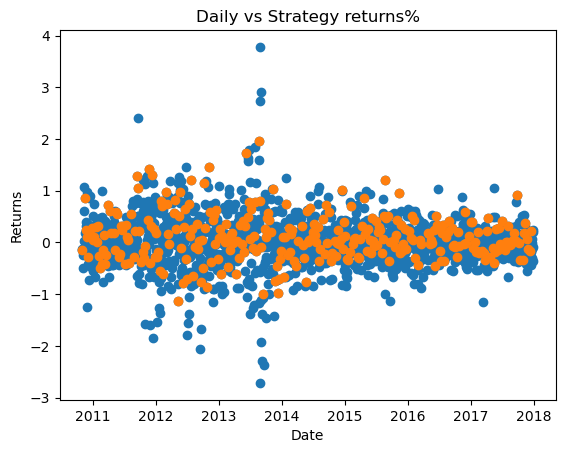

In [97]:
## Plot a Scatter Plot daily returns of the underlying to get an idea of distribution of returns. 
x=data1['Timestamp']
y=data1['daily%']
filtered_data =data1[data1['gain%']!=0]
x2=filtered_data['Timestamp']
z=filtered_data['gain%']
plt.scatter(x,y,label='daily%')
plt.scatter(x2,z,label='gain%')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily vs Strategy returns%')
plt.show()

In [77]:
# Create a Function to Calculate Maximum Drawdown for a given data series
def calc_max_dd(data_series):
    
  cumm_ret=data_series.cumsum()
  hwm=cumm_ret.cummax()   #highest water mark
  dd=cumm_ret-hwm
  return round(min(dd),2)  # roundoff to 2 decimal places

In [78]:
# Replacing Nan values
data1['gain%'].fillna(0, inplace=True)

max_dd = calc_max_dd(data1['gain%'])
trades= data1['position'].sum()
print(f'SI Max DD: {max_dd}%  and Total No. of Trades are: {trades}')

SI Max DD: -4.46%  and Total No. of Trades are: 314


<AxesSubplot:xlabel='Timestamp'>

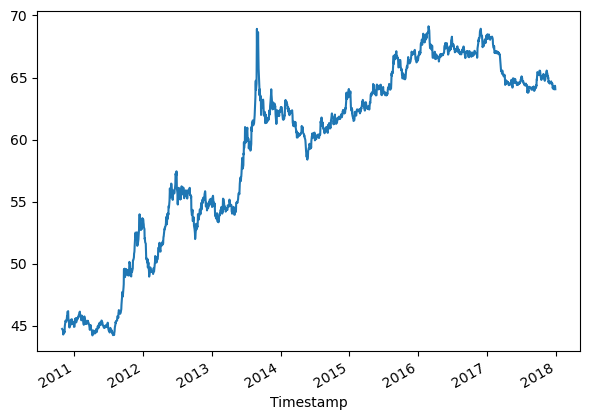

In [79]:
data1.set_index(data1['Timestamp'])['Adjusted Price(average)'].plot(figsize=(7,5))

# Trying out various levels of leverage

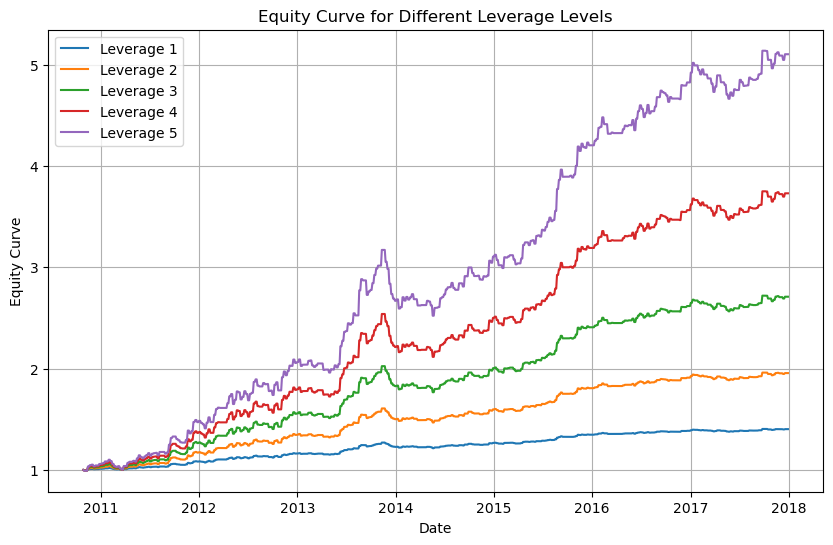

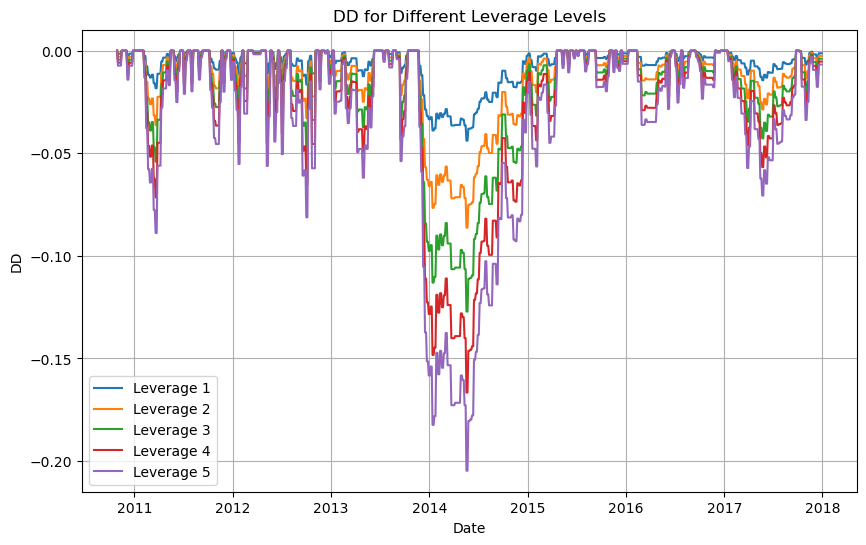

In [80]:
# Leverage levels
leverages = [1, 2, 3, 4 , 5]

# Calculate equity curve for each leverage level
equity_curves = {}
drawdowns={}
for leverage in leverages:
    equity_curve = (1 + leverage *(data1['gain%']/100) ).cumprod()
    equity_curves[leverage] = equity_curve

# Calculating drawdowns
    previous_peaks = equity_curve.cummax()
    drawdown = (equity_curve - previous_peaks) / previous_peaks
    drawdowns[leverage] = drawdown
    
# Plot the equity and drawdown curves
plt.figure(figsize=(10, 6))
for leverage, equity_curve in equity_curves.items():
    plt.plot(data1['Timestamp'], equity_curve, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('Equity Curve')
plt.title('Equity Curve for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for leverage, drawdown in drawdowns.items():
    plt.plot(data1['Timestamp'], drawdown, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('DD')
plt.title('DD for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()


# Monty Carlo Simulation, copied from @Ankit_Quant

In [81]:
# Monty Carlo Simulation

def monte_carlo(simulations,df):
 
  mdd_list=[]
  for s in range(simulations):
    mdd=0
    reshuffle=data1['gain%'].sample(frac=1).reset_index(drop=True)
    plt.plot(reshuffle.cumsum())
    mdd=calc_max_dd(reshuffle)
    mdd_list.append(mdd)
  plt.plot(data1['gain%'].cumsum(),linewidth=3,color='black')
  plt.xlabel('Trade No.')
  plt.ylabel('Cummulative Returns')
  plt.title('Monte Carlo Simulation for {} Simulations'.format(simulations))
  plt.show()

  return mdd_list

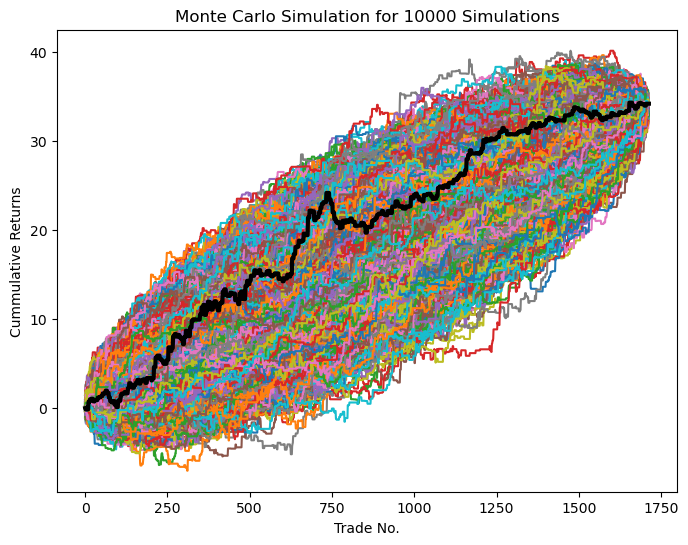

In [82]:

simulations=10000
plt.figure(figsize=(8,6))
mdd_list=monte_carlo(simulations,data1)

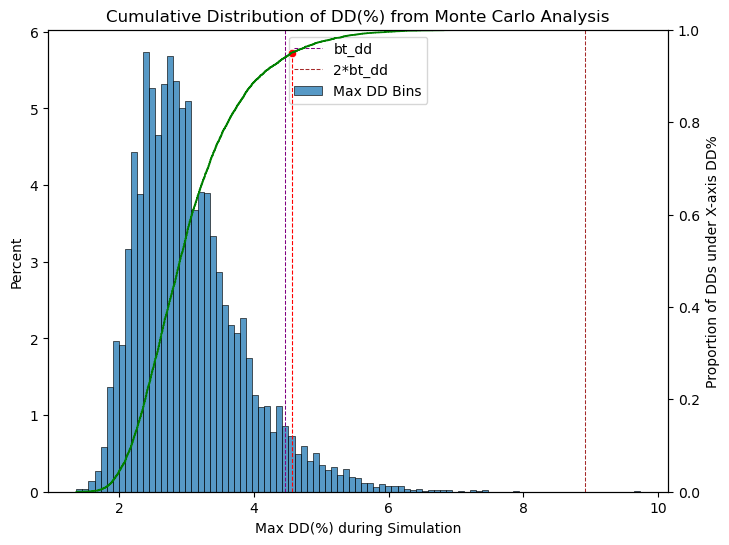

Backtest Drawdown: -4.46% , The 95.0 percentile of the Drawdown based on Monte Carlo is:4.56%


In [83]:
df_mdd=pd.DataFrame(mdd_list,columns=['Max DD'])
n_tile=0.95 # Cut-Off Percentile to plot 
n_tile_value=np.round(df_mdd['Max DD'].quantile(q=1-n_tile),2)
bt_dd=calc_max_dd(data1['gain%'])
fig,ax=plt.subplots(1,1,figsize=(8,6))
sns.histplot(ax=ax,x=-1*df_mdd['Max DD'],stat='percent')#,cumulative=True)
ax.set_title('Cumulative Distribution of DD(%) from Monte Carlo Analysis')
ax.set_xlabel('Max DD(%) during Simulation')
ax.axvline(-bt_dd,ymax=1,color='purple',linestyle='dashed',linewidth=0.75)
ax.axvline(-2*bt_dd,ymax=1,color='brown',linestyle='dashed',linewidth=0.75)
ax.legend(labels=['bt_dd','2*bt_dd','Max DD Bins'])
ax2 = ax.twinx()
sns.ecdfplot(ax=ax2,x=-1*df_mdd['Max DD'],color='green',linewidth=1.25)
sns.scatterplot(x=[-1*n_tile_value],y=[n_tile],ax=ax2,color='red')
ax2.axvline(-1*n_tile_value,ymax=n_tile,color='red',linestyle='dashed',linewidth=0.8)
ax2.set_ylabel('Proportion of DDs under X-axis DD%')
plt.show()
print(f'Backtest Drawdown: {bt_dd}% , The {n_tile*100} percentile of the Drawdown based on Monte Carlo is:{-1*n_tile_value}%')

# Forward testing on data 

In [84]:
data2.head()

,Expiry,Previous settle,Open,High,Low,Close,Settle,Timestamp,Settlement diff,returns %,Adjusted Price(average),Points,Day_of_week,Day_of_month,month,year
1714,2018-01-29,64.0575,64.0425,64.060,63.8325,63.8775,63.8775,2018-01-01,0.0,-0.28%,63.8775,-0.1800,0.0,1.0,1.0,2018.0
1715,2018-01-29,63.8775,63.8950,63.960,63.6175,63.6550,63.6550,2018-01-02,0.0,-0.35%,63.6550,-0.2225,1.0,2.0,1.0,2018.0
1716,2018-01-29,63.6550,63.7150,63.755,63.6225,63.7050,63.7050,2018-01-03,0.0,0.08%,63.7050,0.0500,2.0,3.0,1.0,2018.0
1717,2018-01-29,63.7050,63.6900,63.770,63.5200,63.5625,63.5625,2018-01-04,0.0,-0.22%,63.5625,-0.1425,3.0,4.0,1.0,2018.0
1718,2018-01-29,63.5625,63.5275,63.575,63.4550,63.5175,63.5175,2018-01-05,0.0,-0.07%,63.5175,-0.0450,4.0,5.0,1.0,2018.0


In [85]:
#backtesting Friday Buy - Monday Sell strategy
#creating the conditional points and % gains column
data2['daily%']=data2['Points']/data2['Adjusted Price(average)']*100
data2['position']=np.where((data2['Day_of_week']==4) & (data2['Day_of_week'].shift(-1)==0),1,0)
data2['gain%']=data2['position'].shift(1) * data2['daily%']

#cutting the dataframe to remove noise
data_oos=pd.DataFrame({'Date': data2['Timestamp'],'Price':data2['Adjusted Price(average)'],'Position':data2['position'],'returns':data2['daily%'],'gain%':data2['gain%']})

data_oos['gain%'].fillna(0, inplace=True)
data_oos.head(8)

,Date,Price,Position,returns,gain%
1714,2018-01-01,63.8775,0,-0.281789,0.000000
1715,2018-01-02,63.6550,0,-0.349540,-0.000000
1716,2018-01-03,63.7050,0,0.078487,0.000000
1717,2018-01-04,63.5625,0,-0.224189,-0.000000
1718,2018-01-05,63.5175,1,-0.070847,-0.000000
1719,2018-01-08,63.6025,0,0.133643,0.133643
1720,2018-01-09,63.8475,0,0.383727,0.000000
1721,2018-01-10,63.7350,0,-0.176512,-0.000000


<AxesSubplot:xlabel='Date'>

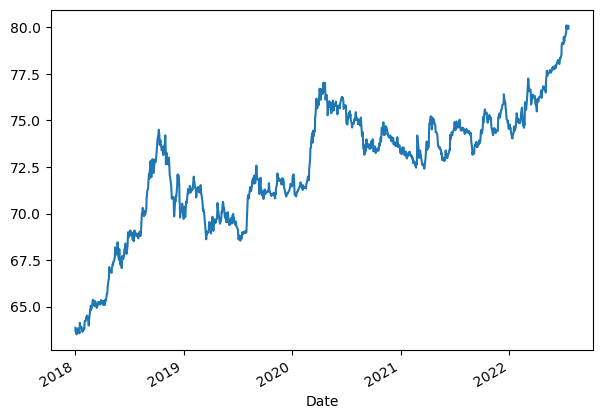

In [86]:
data_oos.set_index(data_oos['Date'])['Price'].plot(figsize=(7,5))

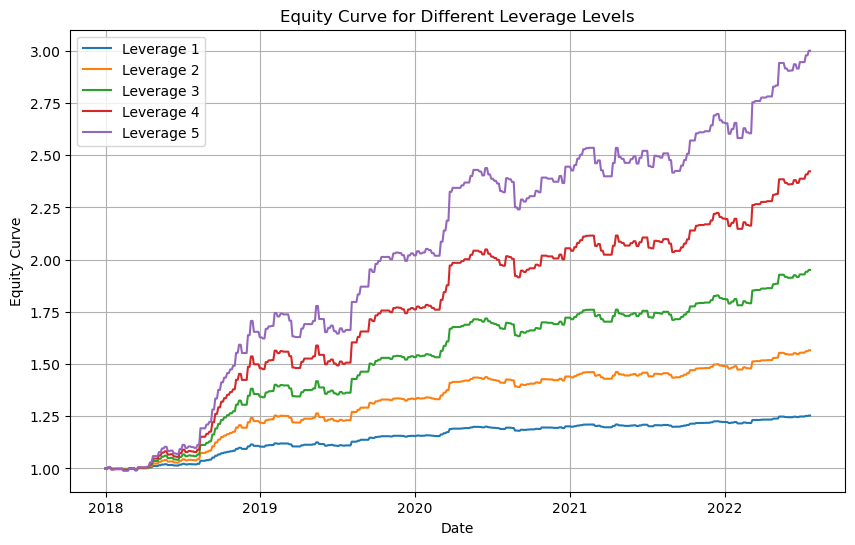

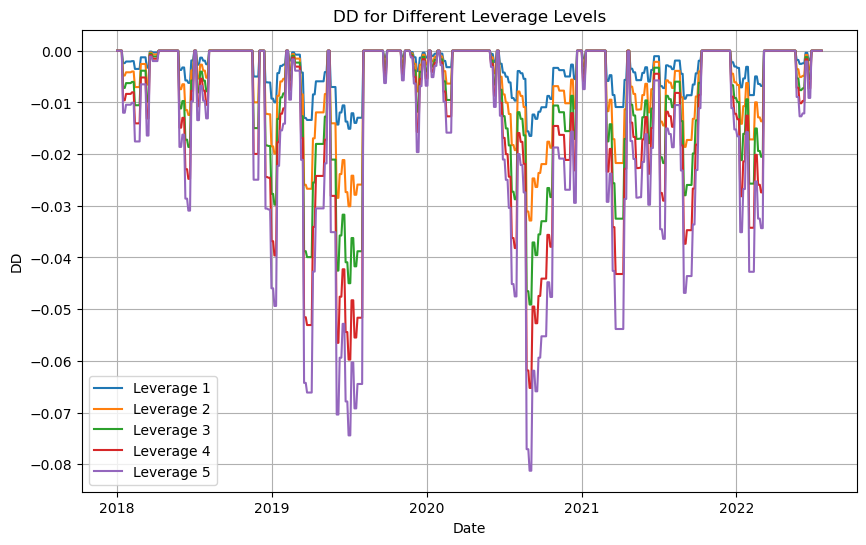

In [87]:
# Leverage levels
leverages = [1, 2, 3, 4 , 5]

# Calculate equity curve for each leverage level
equity_curves = {}
drawdowns={}
for leverage in leverages:
    equity_curve = (1 + leverage *(data_oos['gain%']/100) ).cumprod()
    equity_curves[leverage] = equity_curve

# Calculating drawdowns
    previous_peaks = equity_curve.cummax()
    drawdown = (equity_curve - previous_peaks) / previous_peaks
    drawdowns[leverage] = drawdown
    
# Plot the equity and drawdown curves
plt.figure(figsize=(10, 6))
for leverage, equity_curve in equity_curves.items():
    plt.plot(data_oos['Date'], equity_curve, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('Equity Curve')
plt.title('Equity Curve for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for leverage, drawdown in drawdowns.items():
    plt.plot(data_oos['Date'], drawdown, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('DD')
plt.title('DD for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()

# Backtest 10-29-2010 to 12-12-2017

# Forward Test 1-1-2018 to 7-21-2022

# Similar analysis can be done for Day of the Month